# **Problem Statement**


## **Context**

An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at 121.61 billion in 2019 and is projected to reach $1,039.03 billion by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID-19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

## **Objective**


ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content on their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

## **Data description**

The data contains the different factors to analyze for the content. The detailed data dictionary is given below.

* visitors: Average number of visitors, in millions, to the platform in the past week

* ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)

* major_sports_event: Any major sports event on the day

* genre: Genre of the content

* dayofweek: Day of the release of the content

* season: Season of the release of the content

* views_trailer: Number of views, in millions, of the content trailer

* views_content: Number of first-day views, in millions, of the content

# **Importing necessary Libraries**

In [163]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Loading the data set**

In [164]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/PGP-DS/3. PM/Project/ottdata.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data overview**

In [165]:
# displaying the first few rows of data set
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [166]:
# checking the shape of data set
df.shape
print('The data set contains ', df.shape[0], ' rows and ', df.shape[1], ' columns.')

The data set contains  1000  rows and  8  columns.


In [167]:
# Checking the data types of the columns for the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


•	The data set contains 1000 rows and 8 columns.

•	There are 5 numeric (float and int type) and 3 string (object type) columns in the data

•	The target variable is Views content, which is of float type.

In [168]:
# statistical summary of the data set
df.describe(include = 'all')

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000
unique,NaN,NaN,NaN,8,7,4,NaN,NaN
top,NaN,NaN,NaN,Others,Friday,Winter,NaN,NaN
freq,NaN,NaN,NaN,255,369,257,NaN,NaN
mean,1.704290,1434.712290,0.400000,NaN,NaN,NaN,66.91559,0.473400
std,0.231973,289.534834,0.490143,NaN,NaN,NaN,35.00108,0.105914
min,1.250000,1010.870000,0.000000,NaN,NaN,NaN,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,NaN,NaN,NaN,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,NaN,NaN,NaN,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,NaN,NaN,NaN,57.75500,0.520000


•	The average number of visitors is approximately 1.704 with a standard deviation of 0.232 in millions.

•	The mean number of ad impressions is about 143.71, ranging from a minimum of 1010.87 to a maximum of 2424.20 in millions.

•	There are 8 unique genres; the most frequent genre is “others” with 255 occurrences.

•	There are 7 unique days and 4 unique seasons in the dataset.

•	The average views for the trailer are approximately 66.91 million, with a standard deviation of 35.00 in millions.

•	The minimum number of views is 30.08, and the maximum is 199.92 in millions.

•	The average views for the content are approximately 0.47 with a standard deviation of 0.106 in millions.

•	The minimum views are 0.22 and the maximum is 0.89 in millions.


# **Exploratory Data analysis**

## Univariate analysis

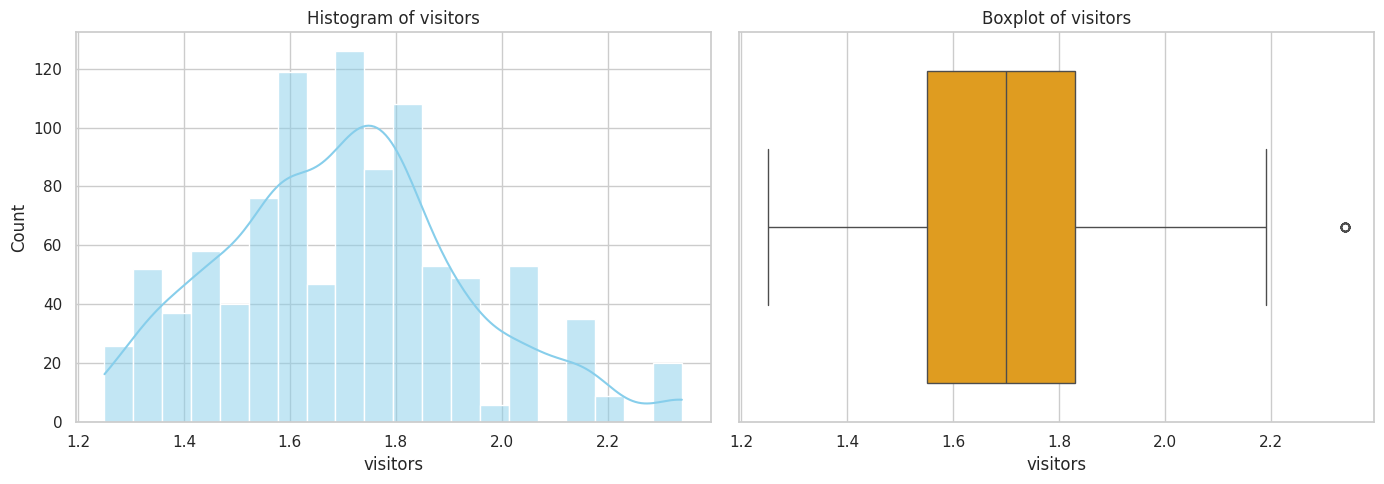

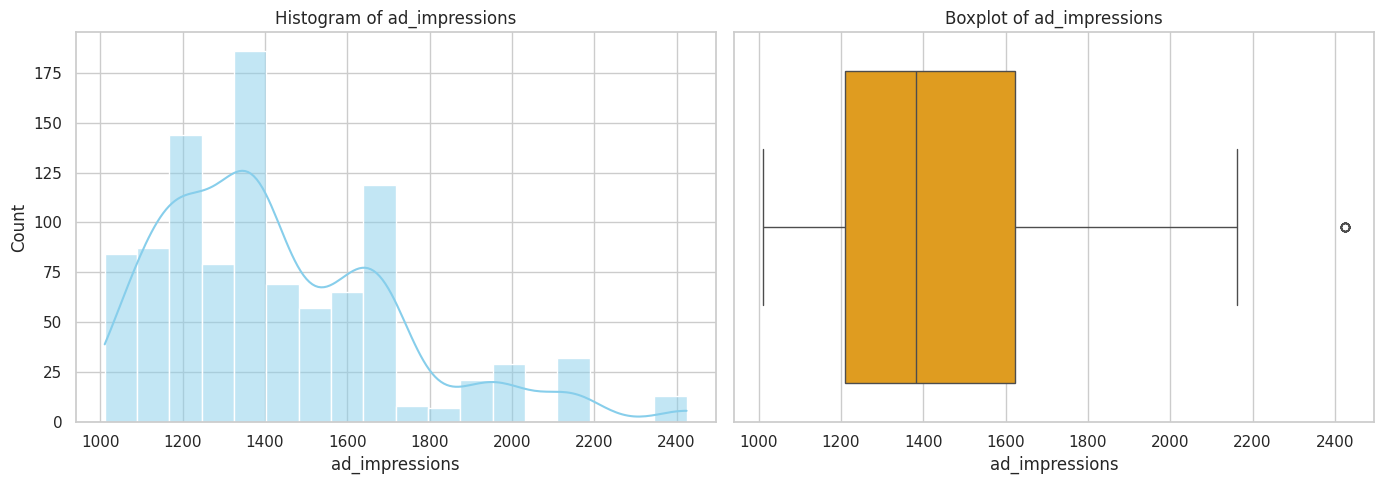

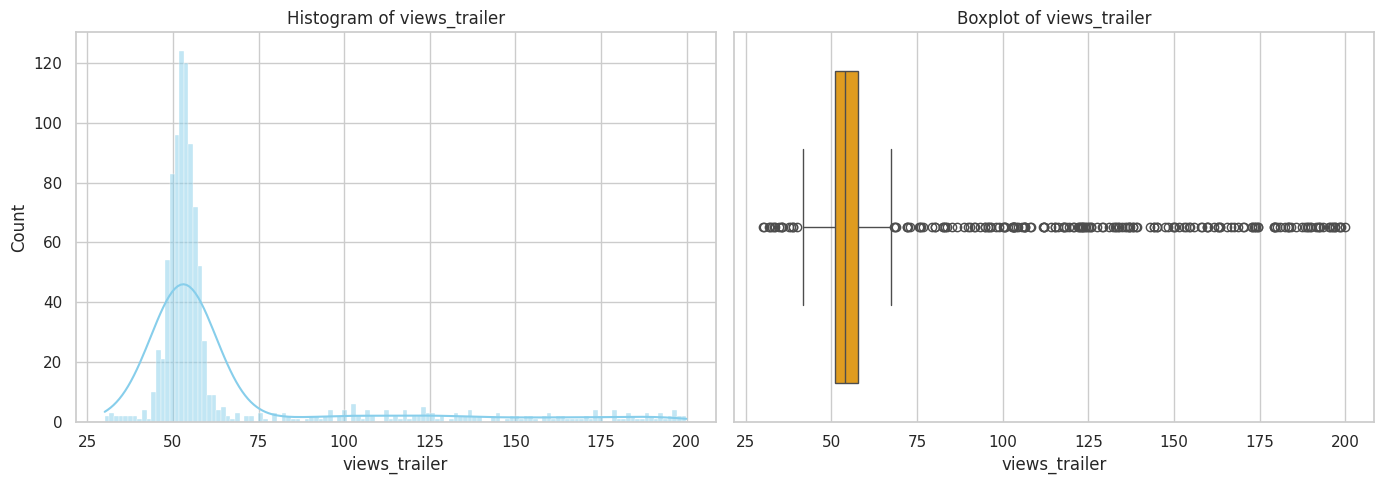

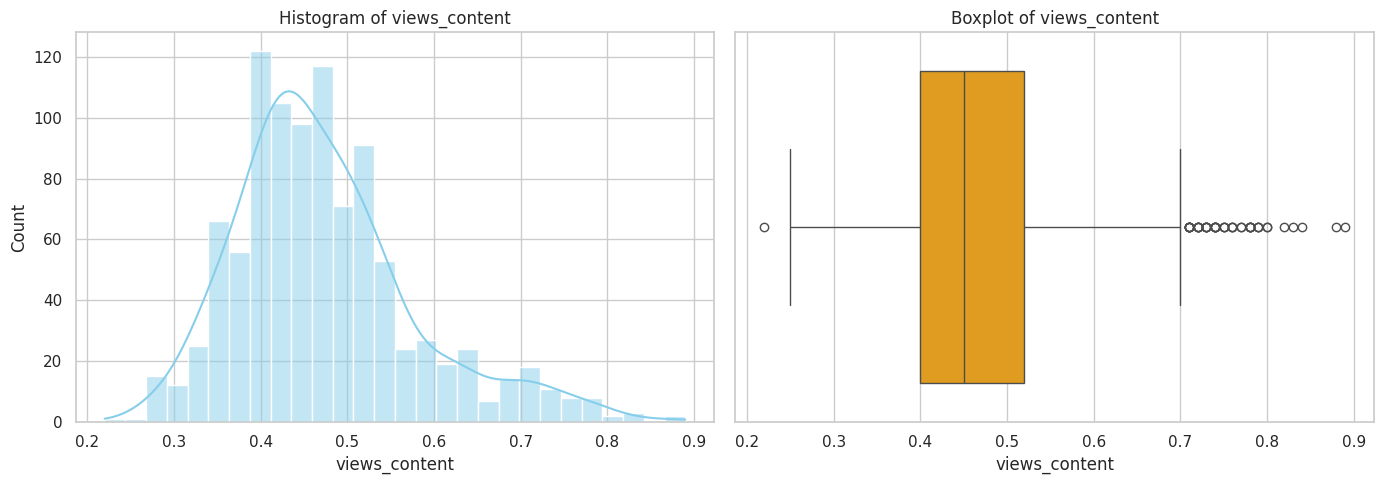

In [169]:
# Histogram and boxplot analysis for all numerical columns
sns.set(style="whitegrid")
numeric_cols = ['visitors', 'ad_impressions', 'views_trailer', 'views_content']

for col in numeric_cols:
    # Histogram
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


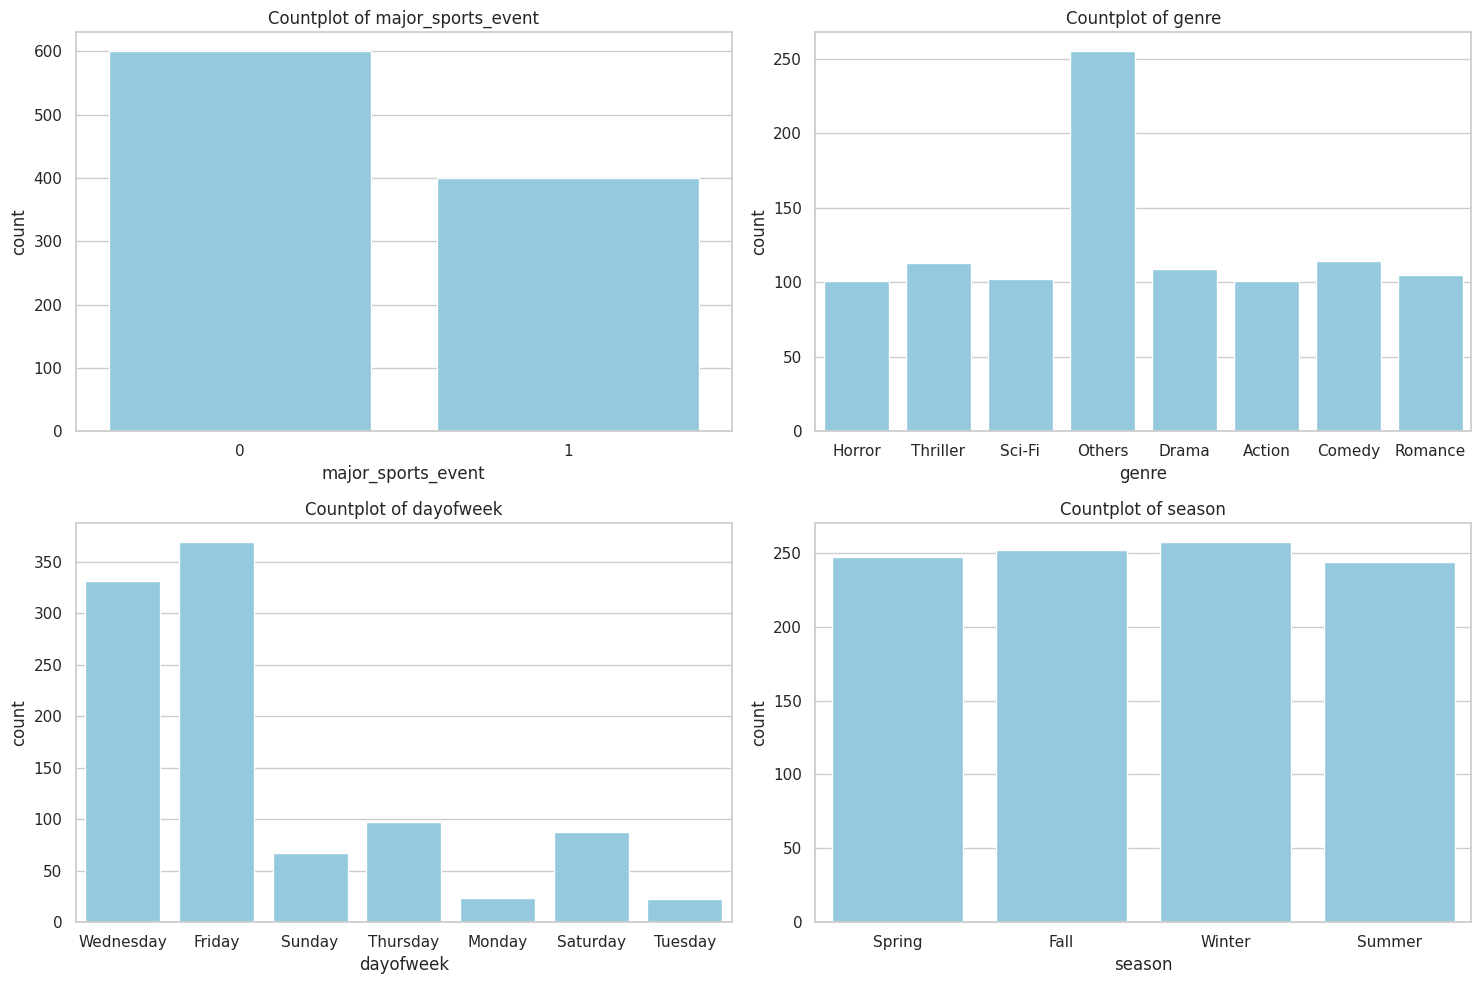

In [170]:
# Countplot for all categorical columns
sns.set(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(15, 10))
categorical_cols = ['major_sports_event', 'genre', 'dayofweek', 'season']
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], data=df, ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

## **Bivariate analysis**

<Axes: >

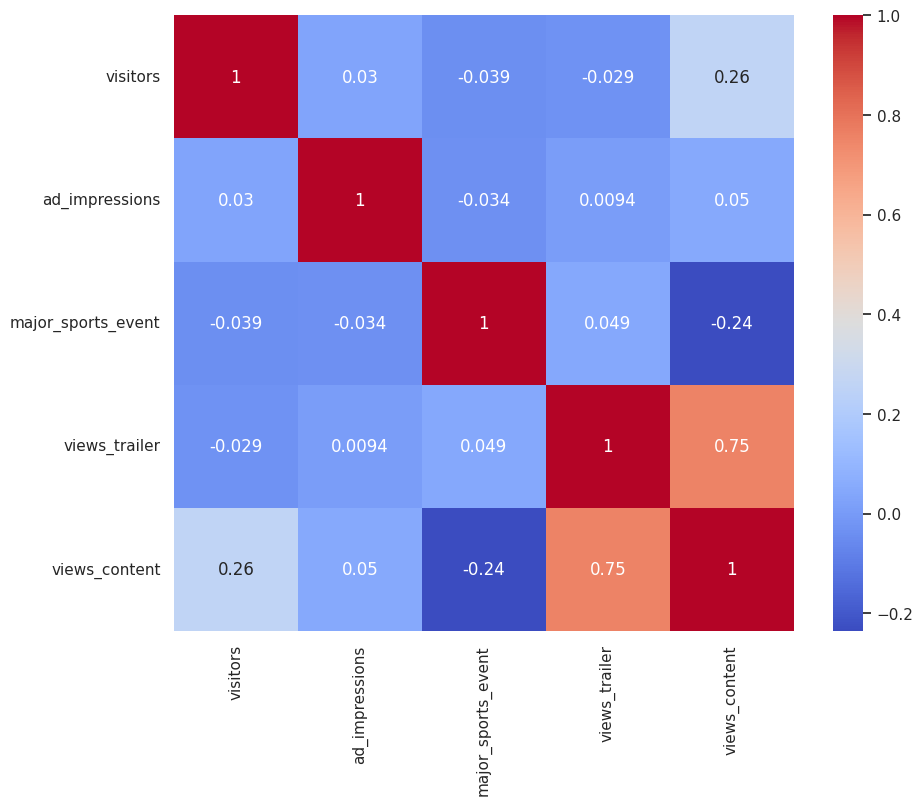

In [171]:
# Correlation heat map on all numerical columns
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Key Questions

<Axes: xlabel='views_content', ylabel='Count'>

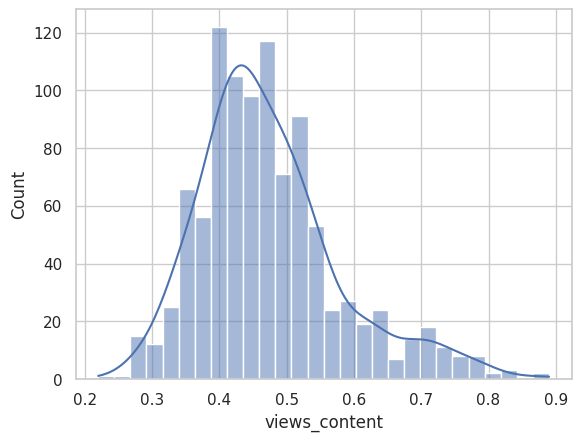

In [172]:
# What does the distribution of content views look like?
sns.histplot(df, x='views_content', kde=True)

<ipython-input-173-3725936513>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre', data=df, palette='Set2');


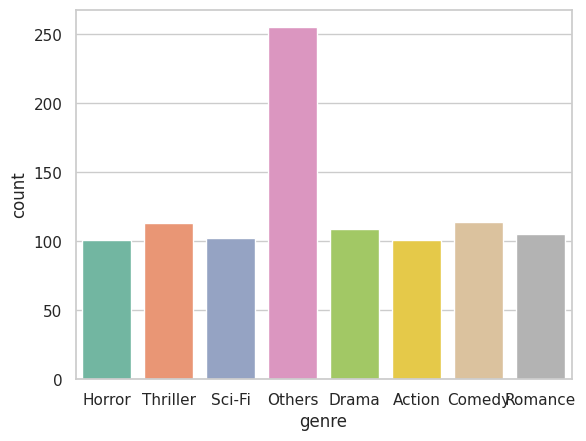

In [173]:
# What does the distribution of genres look like?
sns.countplot(x='genre', data=df, palette='Set2');

<ipython-input-174-3179036959>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dayofweek', y='views_content', data=df, palette= 'pastel')


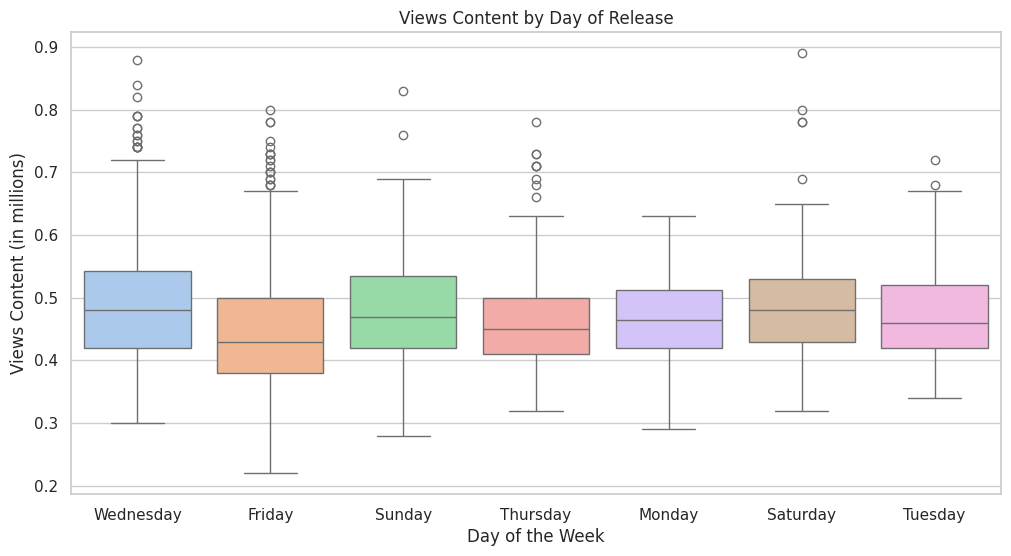

In [174]:
#  How does the viewership vary with the day of release?

#  Boxplot to visualize views_content by day of release
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='dayofweek', y='views_content', data=df, palette= 'pastel')
plt.title('Views Content by Day of Release')
plt.xlabel('Day of the Week')
plt.ylabel('Views Content (in millions)')
plt.show()

<ipython-input-175-1548723162>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='views_content', data=df, palette='Set2')


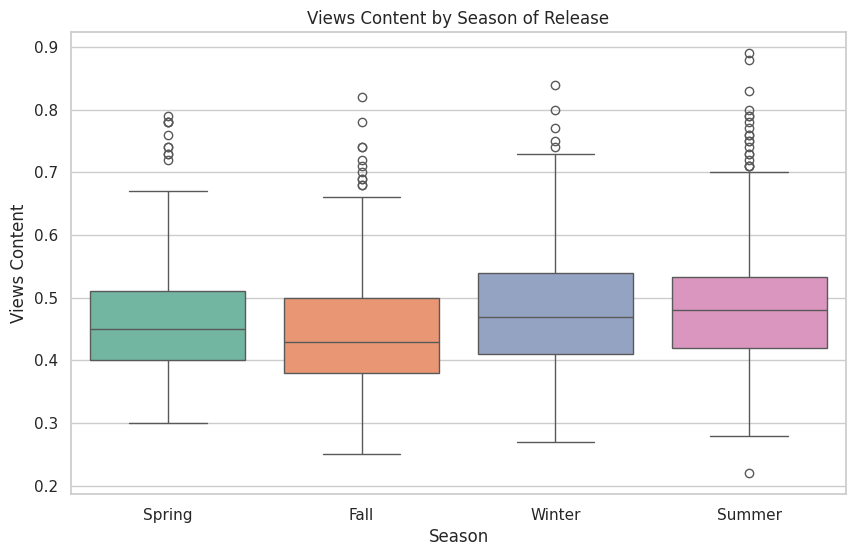

In [175]:
# Boxplot to visualize views_content by season
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='views_content', data=df, palette='Set2')
plt.title('Views Content by Season of Release')
plt.xlabel('Season')
plt.ylabel('Views Content')
plt.show()

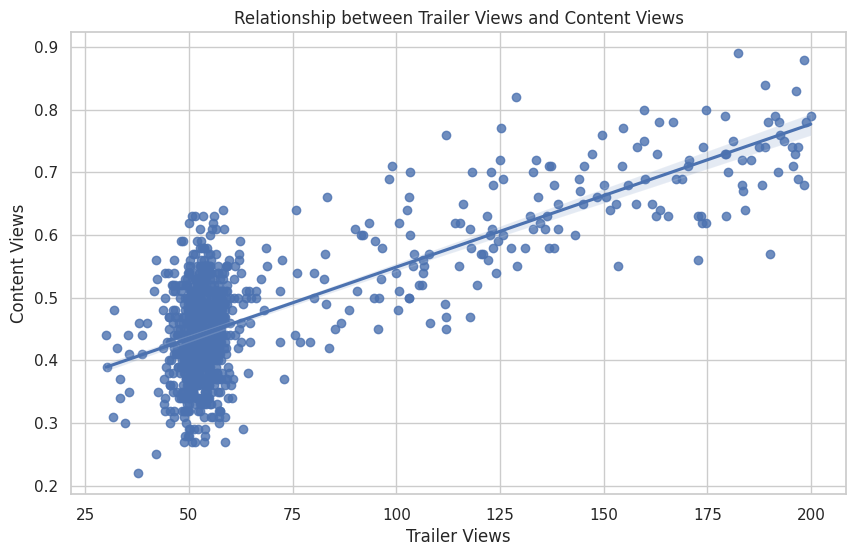

In [176]:
# Finding correlation between trailer views and content views
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='views_trailer', y='views_content')
plt.title('Relationship between Trailer Views and Content Views')
plt.xlabel('Trailer Views')
plt.ylabel('Content Views')
plt.show()

In [177]:
# To get the numerical value of the correlation between views_content & views_trailer
df['views_content'].corr(df['views_trailer'])

np.float64(0.753962214820536)

# **Data Preprocessing**

In [178]:
# Checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [179]:
# Missing values check
df.isnull().sum()

,0
visitors,0
ad_impressions,0
major_sports_event,0
genre,0
dayofweek,0
season,0
views_trailer,0
views_content,0


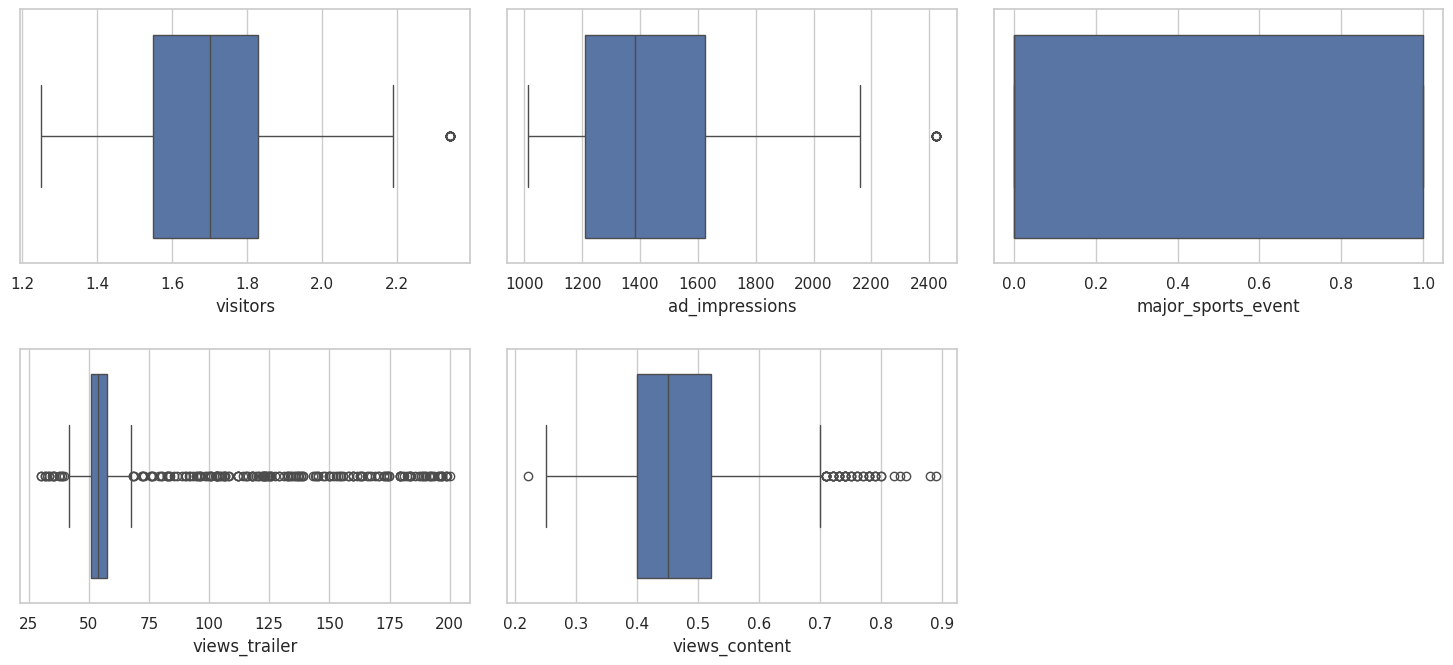

In [180]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

# **Data Preparation for Modelling**

In [181]:
# Defining x and y variables
X = df.drop('views_content', axis=1)
y = df['views_content']

print(X.head())

   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      1.85         1342.77                   1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                   0    Sci-Fi     Sunday  Winter   

   views_trailer  
0          56.70  
1          52.69  
2          48.74  
3          49.81  
4          55.83  


In [182]:
print(y.head())

0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64


In [183]:
# let's add the intercept to data
X = sm.add_constant(X)

In [184]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)
X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0,56.70,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,1.0,1.46,1498.41,1,52.69,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.0,1.47,1079.19,1,48.74,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.0,1.85,1342.77,1,49.81,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,1.46,1498.41,0,55.83,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [185]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                1000 non-null   float64
 1   visitors             1000 non-null   float64
 2   ad_impressions       1000 non-null   float64
 3   major_sports_event   1000 non-null   float64
 4   views_trailer        1000 non-null   float64
 5   genre_Comedy         1000 non-null   float64
 6   genre_Drama          1000 non-null   float64
 7   genre_Horror         1000 non-null   float64
 8   genre_Others         1000 non-null   float64
 9   genre_Romance        1000 non-null   float64
 10  genre_Sci-Fi         1000 non-null   float64
 11  genre_Thriller       1000 non-null   float64
 12  dayofweek_Monday     1000 non-null   float64
 13  dayofweek_Saturday   1000 non-null   float64
 14  dayofweek_Sunday     1000 non-null   float64
 15  dayofweek_Thursday   1000 non-null   fl

In [186]:
# splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


# **Model Building**

In [187]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 15 Jun 2025   Prob (F-statistic):          1.32e-215
Time:                        07:42:56   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    

In [188]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):


# predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape =  mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [189]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.04853,0.038197,0.791616,0.785162,8.55644


In [190]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050603,0.040782,0.766447,0.748804,9.030464


## Treating variables with high p values


In [191]:
# copying the data
X_train.copy()

max_p_value = 0.05

model = olsmodel = sm.OLS(y_train, X_train).fit()

# extracting columns which are having p values > 0.05
p_values = model.pvalues > 0.05

print(p_values)

const                  False
visitors               False
ad_impressions          True
major_sports_event     False
views_trailer          False
genre_Comedy            True
genre_Drama             True
genre_Horror            True
genre_Others            True
genre_Romance           True
genre_Sci-Fi            True
genre_Thriller          True
dayofweek_Monday       False
dayofweek_Saturday     False
dayofweek_Sunday       False
dayofweek_Thursday     False
dayofweek_Tuesday       True
dayofweek_Wednesday    False
season_Spring          False
season_Summer          False
season_Winter          False
dtype: bool


In [192]:
# Dropping the columns with high p values
X_trainnew = X_train.drop(X_train.columns[p_values], axis=1)
X_testnew = X_test.drop(X_test.columns[p_values], axis=1)

print(X_trainnew.head())
print(X_testnew.head())

     const  visitors  major_sports_event  views_trailer  dayofweek_Monday  \
731    1.0      1.64                 0.0          49.62               0.0   
716    1.0      1.69                 0.0         132.93               0.0   
640    1.0      1.47                 0.0          54.13               0.0   
804    1.0      1.49                 0.0         106.62               0.0   
737    1.0      2.19                 0.0          52.04               0.0   

     dayofweek_Saturday  dayofweek_Sunday  dayofweek_Thursday  \
731                 0.0               0.0                 0.0   
716                 0.0               0.0                 0.0   
640                 0.0               0.0                 0.0   
804                 0.0               0.0                 0.0   
737                 0.0               0.0                 0.0   

     dayofweek_Wednesday  season_Spring  season_Summer  season_Winter  
731                  0.0            0.0            1.0            0.0  
71

## Rebuilding the new model

In [193]:
#Rebuilding the model
olsmodel_new = sm.OLS(y_train, X_trainnew).fit()
print(olsmodel_new.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 15 Jun 2025   Prob (F-statistic):          7.03e-224
Time:                        07:42:56   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [194]:
# checking the performance of training set
print("Training Performance\n")
olsmodel_new_train_perf = model_performance_regression(olsmodel_new, X_trainnew, y_train)
olsmodel_new_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [195]:
# Checking the performance of test set
print("Test Performance\n")
olsmodel_new_test_perf = model_performance_regression(olsmodel_new, X_testnew, y_test)
olsmodel_new_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


# **Checking Linear Regression Assumptions**

## Test for Multicollinearity

In [196]:
# Test for Multi collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [197]:
checking_vif(X_trainnew)

,feature,VIF
0,const,61.581198
1,visitors,1.017353
2,major_sports_event,1.029599
3,views_trailer,1.014347
4,dayofweek_Monday,1.050316
5,dayofweek_Saturday,1.136617
6,dayofweek_Sunday,1.118152
7,dayofweek_Thursday,1.149491
8,dayofweek_Wednesday,1.271387
9,season_Spring,1.517768


## Test for linearity and Independence


In [198]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.452102,-0.052102
716,0.70,0.679675,0.020325
640,0.42,0.431537,-0.011537
804,0.55,0.562329,-0.012329
737,0.59,0.552069,0.037931


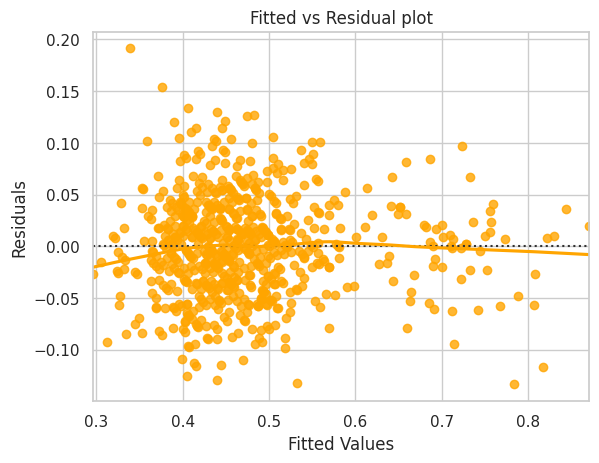

In [199]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="orange" ,lowess= 'True'
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

## Test for noramlity

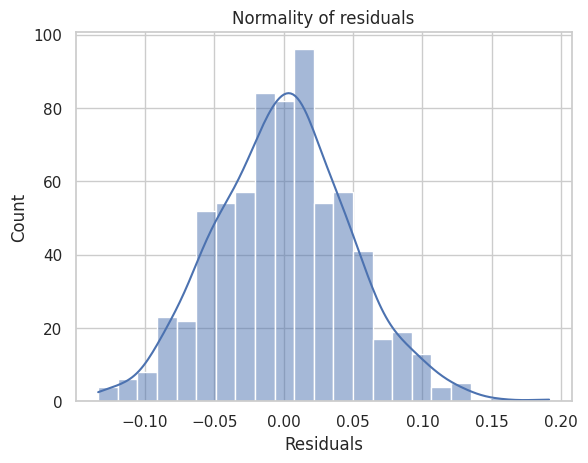

In [200]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

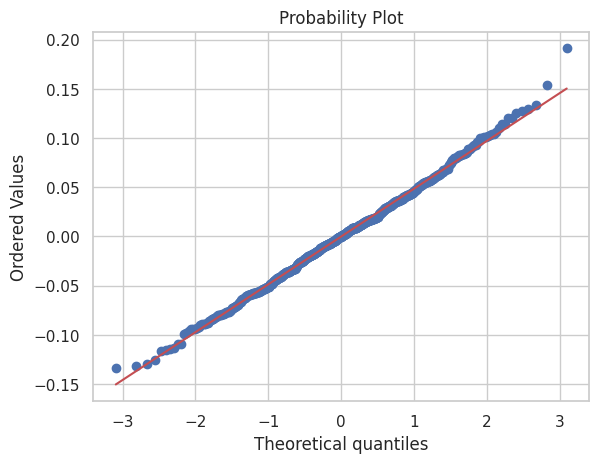

In [201]:
# Creating Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [202]:
# Checking the shapiro test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=np.float64(0.9972310881741855), pvalue=np.float64(0.28468198171294534))

## Test for Homoscedasticity

In [203]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_trainnew)
lzip(name, test)

[('F statistic', np.float64(1.1420254349208463)),
 ('p-value', np.float64(0.1113404782044664))]

In [204]:
# predictions on the test set
pred = olsmodel_new.predict(X_testnew)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
display(df_pred_test.sample(10, random_state=1))

,Actual,Predicted
983,0.43,0.434802
194,0.51,0.500314
314,0.48,0.430257
429,0.41,0.492544
267,0.41,0.487034
746,0.68,0.680000
186,0.62,0.595078
964,0.48,0.503909
676,0.42,0.490313
320,0.58,0.560155


# **Final Model**

Now we will drop the variables with high p values and built our new model.

In [205]:
X_trainfinal = X_trainnew
X_testfinal = X_testnew

y_trainfinal = y_train
y_testfinal = y_test

In [206]:
olsmodel_final = sm.OLS(y_trainfinal, X_trainfinal).fit()

In [207]:
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 15 Jun 2025   Prob (F-statistic):          7.03e-224
Time:                        07:42:58   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [208]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, X_trainfinal, y_trainfinal
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [209]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, X_testfinal, y_testfinal
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


In [210]:
# predictions on the test set
pred = olsmodel_final.predict(X_testfinal)

df_pred_test = pd.DataFrame({"Actual": y_testfinal, "Predicted": pred})
display(df_pred_test.sample(10, random_state=1))

,Actual,Predicted
983,0.43,0.434802
194,0.51,0.500314
314,0.48,0.430257
429,0.41,0.492544
267,0.41,0.487034
746,0.68,0.680000
186,0.62,0.595078
964,0.48,0.503909
676,0.42,0.490313
320,0.58,0.560155


We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable